# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../data/boston_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 14 columns):
crim       404 non-null float64
zn         404 non-null float64
indus      404 non-null float64
chas       404 non-null float64
nox        404 non-null float64
rm         404 non-null float64
age        404 non-null float64
dis        404 non-null float64
rad        404 non-null float64
tax        404 non-null float64
ptratio    404 non-null float64
black      404 non-null float64
lstat      404 non-null float64
medv       404 non-null float64
dtypes: float64(14)
memory usage: 44.3 KB


In [4]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [5]:
df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

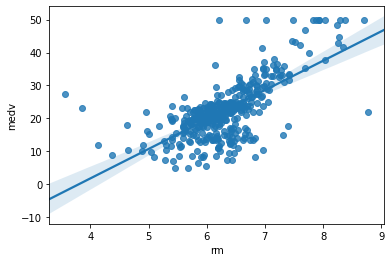

In [6]:
sns.regplot(df['rm'], df['medv'])

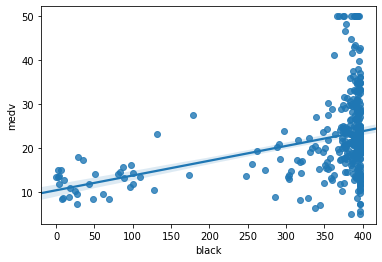

In [7]:
sns.regplot(df['black'], df['medv'])

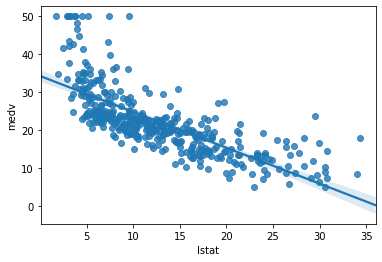

In [8]:
sns.regplot(df['lstat'], df['medv'])

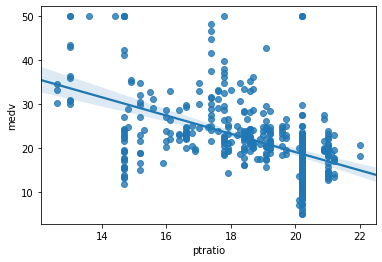

In [9]:
sns.regplot(df['ptratio'], df['medv'])

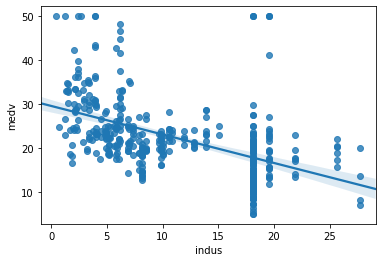

In [10]:
sns.regplot(df['indus'], df['medv'])

In [11]:
df.corrwith(df['medv']).abs().sort_values()

chas       0.141400
dis        0.264876
zn         0.355608
black      0.360071
age        0.390863
crim       0.400956
rad        0.423508
nox        0.439225
tax        0.495792
indus      0.501698
ptratio    0.506313
rm         0.683541
lstat      0.742695
medv       1.000000
dtype: float64

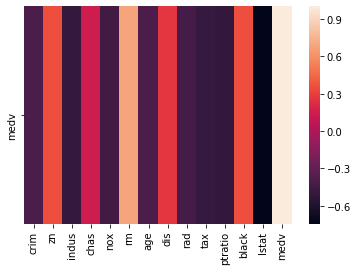

In [12]:
sns.heatmap(df.corr().loc[['medv'],:])

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [13]:
# it's more less as expected from the corrwith()

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

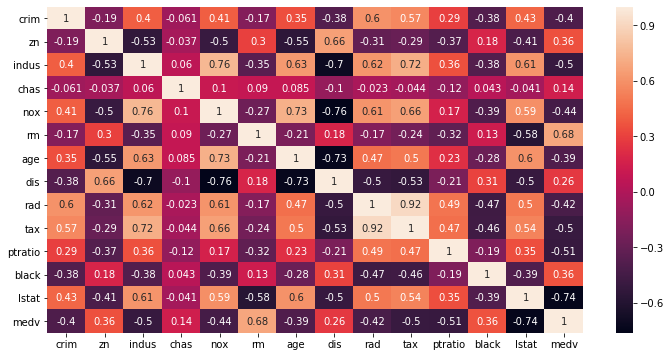

In [14]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True)
# I think the corrwith .abs shows the really correlated cols.

In [15]:
df.corr().loc['medv',:]

crim      -0.400956
zn         0.355608
indus     -0.501698
chas       0.141400
nox       -0.439225
rm         0.683541
age       -0.390863
dis        0.264876
rad       -0.423508
tax       -0.495792
ptratio   -0.506313
black      0.360071
lstat     -0.742695
medv       1.000000
Name: medv, dtype: float64

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [16]:
df['medv'].describe()

count    404.000000
mean      22.312376
std        8.837019
min        5.000000
25%       17.100000
50%       21.400000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [17]:
from sklearn.metrics import r2_score, mean_squared_error

def performance_metric(y_t, y_p):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    return r2_score(y_t, y_p)

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X = df.drop('medv', axis=1)

In [20]:
y= df['medv']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [22]:
from sklearn.ensemble import RandomForestRegressor
md = [1,2,4,6,8,10,12,14]
test_list = []
train_list = []

for m in md:
    model = RandomForestRegressor(max_depth=m)
    model.fit(X_train,y_train)
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(f'R2 score for X_test with {m} max depth :')
    print(performance_metric(y_test, y_pred_test))
    print(f'R2 score for X_train with {m} max depth:')
    print(performance_metric(y_train, y_pred_train))
    
    test_list.append(performance_metric(y_test, y_pred_test))
    train_list.append(performance_metric(y_train, y_pred_train))

R2 score for X_test with 1 max depth :
0.555649990990072
R2 score for X_train with 1 max depth:
0.5993443666385427
R2 score for X_test with 2 max depth :
0.7525529581869236
R2 score for X_train with 2 max depth:
0.775602195003542
R2 score for X_test with 4 max depth :
0.8166025618660806
R2 score for X_train with 4 max depth:
0.9111017521544513
R2 score for X_test with 6 max depth :
0.8521147094845213
R2 score for X_train with 6 max depth:
0.9514108596135207
R2 score for X_test with 8 max depth :
0.8241608471183405
R2 score for X_train with 8 max depth:
0.9606268626636414
R2 score for X_test with 10 max depth :
0.8138446926989116
R2 score for X_train with 10 max depth:
0.955815869938836
R2 score for X_test with 12 max depth :
0.8192237720831287
R2 score for X_train with 12 max depth:
0.967538587660995
R2 score for X_test with 14 max depth :
0.7970458187635321
R2 score for X_train with 14 max depth:
0.940674218728837


Now, plot the score for each tree on the training set and on the testing set.

In [23]:
# Produce a plot with the score for the testing and training for the different max depths

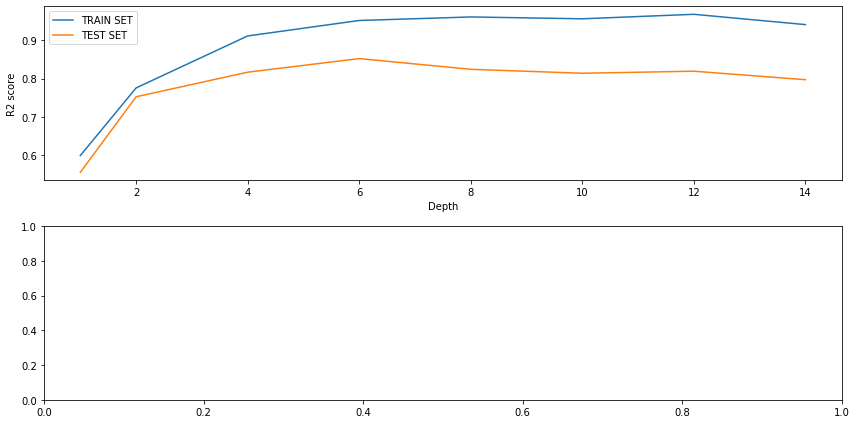

In [24]:
fig, axs = plt.subplots(2,1, figsize=(12,6))
sns.lineplot(x=md, y=train_list, ax=axs[0], label='TRAIN SET')
axs[0].set(xlabel='Depth', ylabel='R2 score')
sns.lineplot(x=md, y=test_list, ax=axs[0], label='TEST SET')
axs[0].set(xlabel='Depth', ylabel='R2 score')



plt.tight_layout()

plt.show()

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [25]:
# depth somewhat increases r2 but after about 2 depth the increase rate decreases

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [26]:
# 1 is high bias, 10 is high variance.

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [27]:
# 5 - 6 MD, after that only the bias increases.

In [28]:
model = RandomForestRegressor(max_depth=6)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [29]:
performance_metric(y_test, y_pred)

0.8179392971468686

In [30]:
# I would go for 6. There is still increase in the score till 8 but at that point we just train for too much bias and it doesn't really change the outcome.

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [31]:
# The data is somewhat irrelevant, but the main selling points and the ratio of the price should be somwhat similar. EG: Number of rooms
# Unfortunately the column names are not so self explanatory and we dont have a description of them: ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax','ptratio', 'black', 'lstat', 'medv']
# I cannot judge the features this way. But there are only a few really correlated attributes so i would say no, they aren't sufficient. And the model isn't robust enough either.
# No, the data collected cannot be applicable to other cities.